## IMDB /TMDB Notebook


In this notebook, we will use data from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers to gain insight on how the new Microsoft Movie studio should proceed in content creation to maximize ratings, reviews, and profit. The data we are using is important and helpful to this case because the information within the data can help us narrow down which genres of movies were well received and yielded higher ratings and grossed higher earnings.

So it looks like we need to join/merge the different tables so we can get the names/ratings/reviews etc matching

ratings with titles on tconstant

once we have the titles we can join the other sets that have the movie names

## business understanding top top explaining the goal and identify questions

diff sections
explain where the data comes from/source
prep explain cleaning
analysis/understanding - recs
conclusion section tying it back in to general overview/main question


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing Data

Eyeballing the data sets to see how many data points we have, what we need to change, and how we can merge the sets together to get a better understanding of our data.

In this set, we have the average ratings for 73,856 and the number of votes for movies/'tconst'.

In [2]:
imdb_ratings = pd.read_csv('../zippedData/imdb.title.ratings.csv.gz')
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [3]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In this data set, we have the name of different employees in the industry and their profession and what titles they're known for. Unsure of how we can use the birth and death years. Will probably drop those two

In [4]:
imdb_name_basics = pd.read_csv('../zippeddata/imdb.name.basics.csv.gz')
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In this data set, we have those same employees on 'nconst' with a more defined category of their position on each movie title 'tconst'. This set seems more useful to define what movies a certain person worked on to see the successs of a movie in relation to the artist.

In [5]:
imdb_principals = pd.read_csv('../zippeddata/imdb.title.principals.csv.gz')
imdb_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


This dataset has the names of the movies in relation to the title_id/'tconst'. We can use the 'title_id' renamed as 'tconst' to merge the sets together.

In [6]:
imdb_akas = pd.read_csv('../zippeddata/imdb.title.akas.csv.gz')
imdb_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [7]:
imdb_akas.rename(columns = {'title_id': 'tconst'}, inplace=True)
imdb_akas

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


This dataset has the directors and writers associated with each movie.

In [8]:
imdb_crew = pd.read_csv('../zippedData/imdb.title.crew.csv.gz')
imdb_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


This data set has genre_ids as integers. We should try to find the associating genre with the ID. It also shows the popularity, releae date, average, and vote count for different movies.

In [9]:
tmdb_movies = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=0)
tmdb_movies = tmdb_movies.drop('id', axis=1)
tmdb_movies

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


This data set has movie titles with the production budget, domestic gross, and the worldwide gross. We can merge the movie titles with the ratings to see how the ratings of movies stack up against the budget and gross.

In [10]:
tnumbers_db_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz', index_col=0)
tnumbers_db_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


## Merging IMDB Ratings Dataset with IMDB Titles

Here we are merging the IMDB name/titles set with the ratings and the directors and writers.

In [11]:
imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [12]:
imdb_akas.rename(columns = {'title_id': 'tconst'}, inplace=True)
imdb_akas

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [13]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [15]:
imdb_df = pd.merge(imdb_akas, imdb_ratings, on='tconst', how='left')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331703 entries, 0 to 331702
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
 8   averagerating      261806 non-null  float64
 9   numvotes           261806 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 27.8+ MB


In [16]:
people_df = pd.merge(imdb_principals, imdb_name_basics, on='nconst', how='left')
people_df

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808
...,...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]",Kenneth Cranham,1944.0,NaN,"actor,soundtrack","tt0095294,tt0375912,tt0063385,tt0985699"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]",Pearl Mackie,1987.0,NaN,actress,"tt9676034,tt5498354,tt0436992,tt8972256"
1028183,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


In [17]:
imdb_df_people_df = pd.merge(imdb_df, people_df, on='tconst', how='left')
imdb_df_people_df

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,averagerating,numvotes,ordering_y,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,10.0,nm0189777,producer,producer,NaN,Patrick Crowley,NaN,NaN,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963"
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,1.0,nm0695435,actor,NaN,"[""Owen""]",Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381"
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,2.0,nm0397171,actress,NaN,"[""Claire""]",Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302"
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,3.0,nm1339223,actor,NaN,"[""Gray""]",Ty Simpkins,NaN,NaN,actor,"tt0369610,tt1300854,tt4154796,tt1591095"
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,4.0,nm0339460,actress,NaN,"[""Karen""]",Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841271,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,5.0,nm1567587,producer,producer,NaN,Iñigo Fernández Ostolaza,NaN,NaN,"editor,producer,director","tt0254455,tt7524694,tt9880178,tt0471112"
2841272,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,6.0,nm7279677,cinematographer,NaN,NaN,Javier de Usabel,NaN,NaN,"camera_department,cinematographer,art_department","tt4948838,tt7002576,tt8951078,tt4164866"
2841273,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,7.0,nm1341556,self,NaN,"[""Himself""]",Jaime Jaimes,NaN,NaN,director,"tt0358405,tt0451590"
2841274,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0,NaN,NaN,8.0,nm4242087,self,NaN,"[""Herself""]",Amparo Malo,NaN,NaN,actress,"tt5159898,tt1805202"


In [18]:
imdb_df_people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2841276 entries, 0 to 2841275
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   tconst              object 
 1   ordering_x          int64  
 2   title               object 
 3   region              object 
 4   language            object 
 5   types               object 
 6   attributes          object 
 7   is_original_title   float64
 8   averagerating       float64
 9   numvotes            float64
 10  ordering_y          float64
 11  nconst              object 
 12  category            object 
 13  job                 object 
 14  characters          object 
 15  primary_name        object 
 16  birth_year          float64
 17  death_year          float64
 18  primary_profession  object 
 19  known_for_titles    object 
dtypes: float64(6), int64(1), object(13)
memory usage: 455.2+ MB


## Filtering out International and Duplicate Names


Below we can see we have multiple names for a single move as it was released in several different markets. We want to isolate and get a single movie title we're familiar with and use that one. We made the decision to subset the US region to get a standard US release title. We filtered out all the different types of release titles as well.

In [19]:
imdb_df['tconst'].value_counts()

tt2488496    61
tt2310332    55
tt1201607    55
tt1790809    53
tt2278871    53
             ..
tt3395316     1
tt5531694     1
tt4479180     1
tt2914396     1
tt5689154     1
Name: tconst, Length: 122302, dtype: int64

In [20]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['region'] == 'US']

Below we can see there's different titles for a single movie and we can filter those out.

In [21]:
imdb_df_people_df['attributes'].value_counts()

new title                 4673
informal English title    1996
literal English title     1548
complete title            1479
alternative spelling      1366
                          ... 
TV listings title           10
third part title            10
first part title             6
first episode title          6
X-rated version              6
Name: attributes, Length: 64, dtype: int64

In [22]:
imdb_df_people_df['types'].value_counts()

imdbDisplay    30354
working        18793
alternative     8381
dvd             2123
festival        1957
tv               308
video            237
original          29
Name: types, dtype: int64

In [23]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'fake working title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal short title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'promotional title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['types'] != 'working']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'IMAX version']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'poster title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != '3-D version']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'director\'s cut']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'alternative spelling']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal alternative title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'long title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'short title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['types'] != 'alternative']

## Removing None and Low Votes

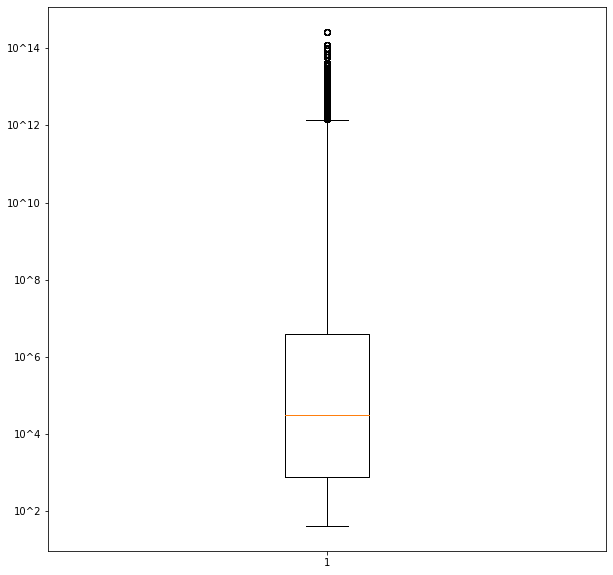

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(np.log(imdb_df_people_df['numvotes'].dropna()));
ax.set_yticks(np.arange(2, 15, 2))
ax.set_yticklabels(['10^2', '10^4', '10^6', '10^8', '10^10', '10^12', '10^14']);

We will filter out movies with less than 10^2 votes

In [25]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['numvotes'] >= 1000]

In [26]:
imdb_df_people_df = imdb_df_people_df.dropna(subset=['numvotes'])
imdb_df_people_df

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,averagerating,numvotes,ordering_y,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
200,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338.0,10.0,nm0189777,producer,producer,NaN,Patrick Crowley,NaN,NaN,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963"
201,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338.0,1.0,nm0695435,actor,NaN,"[""Owen""]",Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381"
202,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338.0,2.0,nm0397171,actress,NaN,"[""Claire""]",Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302"
203,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338.0,3.0,nm1339223,actor,NaN,"[""Gray""]",Ty Simpkins,NaN,NaN,actor,"tt0369610,tt1300854,tt4154796,tt1591095"
204,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338.0,4.0,nm0339460,actress,NaN,"[""Karen""]",Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841044,tt9562694,5,Alien Warfare,US,NaN,imdbDisplay,NaN,0.0,2.6,1509.0,5.0,nm1371053,director,NaN,NaN,Jeremiah Jones,1981.0,NaN,"director,writer,editor","tt1776107,tt5786602,tt3748634,tt9562694"
2841045,tt9562694,5,Alien Warfare,US,NaN,imdbDisplay,NaN,0.0,2.6,1509.0,6.0,nm6188062,writer,NaN,NaN,Ben Bailey,NaN,NaN,"writer,actor,producer","tt9562694,tt4703442,tt4793092,tt7546680"
2841046,tt9562694,5,Alien Warfare,US,NaN,imdbDisplay,NaN,0.0,2.6,1509.0,7.0,nm10597982,writer,NaN,NaN,Dave Baker,NaN,NaN,NaN,NaN
2841047,tt9562694,5,Alien Warfare,US,NaN,imdbDisplay,NaN,0.0,2.6,1509.0,8.0,nm5703427,writer,NaN,NaN,Nathan Zoebl,NaN,NaN,"writer,director,cinematographer","tt7546680,tt5478670,tt9327836,tt3986368"


In [27]:
imdb_df_people_df = imdb_df_people_df[['tconst', 'title', 'averagerating', 'numvotes', 'category', 'primary_name', 'nconst']]

In [28]:
imdb_df_people_df

,tconst,title,averagerating,numvotes,category,primary_name,nconst
200,tt0369610,Jurassic World,7.0,539338.0,producer,Patrick Crowley,nm0189777
201,tt0369610,Jurassic World,7.0,539338.0,actor,Chris Pratt,nm0695435
202,tt0369610,Jurassic World,7.0,539338.0,actress,Bryce Dallas Howard,nm0397171
203,tt0369610,Jurassic World,7.0,539338.0,actor,Ty Simpkins,nm1339223
204,tt0369610,Jurassic World,7.0,539338.0,actress,Judy Greer,nm0339460
...,...,...,...,...,...,...,...
2841044,tt9562694,Alien Warfare,2.6,1509.0,director,Jeremiah Jones,nm1371053
2841045,tt9562694,Alien Warfare,2.6,1509.0,writer,Ben Bailey,nm6188062
2841046,tt9562694,Alien Warfare,2.6,1509.0,writer,Dave Baker,nm10597982
2841047,tt9562694,Alien Warfare,2.6,1509.0,writer,Nathan Zoebl,nm5703427


## Merging the IMDB dataset  To the Numbers Dataset

Renaming the movie column header to title to join tables together.

In [29]:
tnumbers_db_df.rename(columns = {'movie': 'title'}, inplace=True)
tnumbers_db_df

,release_date,title,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [30]:
imdb_tndb = pd.merge(imdb_df_people_df, tnumbers_db_df, on='title', how='inner')
imdb_tndb

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0369610,Jurassic World,7.0,539338.0,producer,Patrick Crowley,nm0189777,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
1,tt0369610,Jurassic World,7.0,539338.0,actor,Chris Pratt,nm0695435,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
2,tt0369610,Jurassic World,7.0,539338.0,actress,Bryce Dallas Howard,nm0397171,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
3,tt0369610,Jurassic World,7.0,539338.0,actor,Ty Simpkins,nm1339223,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
4,tt0369610,Jurassic World,7.0,539338.0,actress,Judy Greer,nm0339460,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
...,...,...,...,...,...,...,...,...,...,...,...
14448,tt6139732,Aladdin,7.4,57549.0,producer,Jonathan Eirich,nm3043818,"Nov 11, 1992","$28,000,000","$217,350,219","$504,050,219"
14449,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"May 24, 2019","$182,000,000","$246,734,314","$619,234,314"
14450,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"Nov 11, 1992","$28,000,000","$217,350,219","$504,050,219"
14451,tt6139732,Aladdin,7.4,57549.0,composer,Alan Menken,nm0579678,"May 24, 2019","$182,000,000","$246,734,314","$619,234,314"


## Changing the data type of monetary values from string into float

In [31]:
imdb_tndb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14453 entries, 0 to 14452
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             14453 non-null  object 
 1   title              14453 non-null  object 
 2   averagerating      14453 non-null  float64
 3   numvotes           14453 non-null  float64
 4   category           14453 non-null  object 
 5   primary_name       14453 non-null  object 
 6   nconst             14453 non-null  object 
 7   release_date       14453 non-null  object 
 8   production_budget  14453 non-null  object 
 9   domestic_gross     14453 non-null  object 
 10  worldwide_gross    14453 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.3+ MB


In [32]:
imdb_tndb['domestic_gross'] = imdb_tndb['domestic_gross'].str.replace(',','')
imdb_tndb['domestic_gross'] = imdb_tndb['domestic_gross'].str.replace('$','')
imdb_tndb['domestic_gross'] = imdb_tndb['domestic_gross'].astype(float)

In [33]:
imdb_tndb['production_budget'] = imdb_tndb['production_budget'].str.replace(',','')
imdb_tndb['production_budget'] = imdb_tndb['production_budget'].str.replace('$','')
imdb_tndb['production_budget'] = imdb_tndb['production_budget'].astype(float)

In [34]:
imdb_tndb['worldwide_gross'] = imdb_tndb['worldwide_gross'].str.replace(',','')
imdb_tndb['worldwide_gross'] = imdb_tndb['worldwide_gross'].str.replace('$','')
imdb_tndb['worldwide_gross'] = imdb_tndb['worldwide_gross'].astype(float)

## Adding ratio of production to worldwide gross column 

In [35]:
imdb_tndb['ratio_production_to_gross'] = imdb_tndb['production_budget'] / imdb_tndb['worldwide_gross']

## Filtering out rows with domestic and worldwide gross is zero

In [36]:
imdb_tndb = imdb_tndb[imdb_tndb['worldwide_gross'] > 0]
imdb_tndb

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross,ratio_production_to_gross
0,tt0369610,Jurassic World,7.0,539338.0,producer,Patrick Crowley,nm0189777,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,0.130394
1,tt0369610,Jurassic World,7.0,539338.0,actor,Chris Pratt,nm0695435,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,0.130394
2,tt0369610,Jurassic World,7.0,539338.0,actress,Bryce Dallas Howard,nm0397171,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,0.130394
3,tt0369610,Jurassic World,7.0,539338.0,actor,Ty Simpkins,nm1339223,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,0.130394
4,tt0369610,Jurassic World,7.0,539338.0,actress,Judy Greer,nm0339460,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,0.130394
...,...,...,...,...,...,...,...,...,...,...,...,...
14448,tt6139732,Aladdin,7.4,57549.0,producer,Jonathan Eirich,nm3043818,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,0.055550
14449,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,0.293911
14450,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,0.055550
14451,tt6139732,Aladdin,7.4,57549.0,composer,Alan Menken,nm0579678,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,0.293911


In [37]:
imdb_tndb = imdb_tndb[imdb_tndb['domestic_gross'] > 0]
imdb_tndb

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross,ratio_production_to_gross
0,tt0369610,Jurassic World,7.0,539338.0,producer,Patrick Crowley,nm0189777,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,0.130394
1,tt0369610,Jurassic World,7.0,539338.0,actor,Chris Pratt,nm0695435,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,0.130394
2,tt0369610,Jurassic World,7.0,539338.0,actress,Bryce Dallas Howard,nm0397171,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,0.130394
3,tt0369610,Jurassic World,7.0,539338.0,actor,Ty Simpkins,nm1339223,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,0.130394
4,tt0369610,Jurassic World,7.0,539338.0,actress,Judy Greer,nm0339460,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,0.130394
...,...,...,...,...,...,...,...,...,...,...,...,...
14448,tt6139732,Aladdin,7.4,57549.0,producer,Jonathan Eirich,nm3043818,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,0.055550
14449,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,0.293911
14450,tt6139732,Aladdin,7.4,57549.0,producer,Dan Lin,nm1469853,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,0.055550
14451,tt6139732,Aladdin,7.4,57549.0,composer,Alan Menken,nm0579678,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,0.293911


## Filtering out movies to only have a time period since 1960.

In [38]:
imdb_tndb['release dates'] = pd.DatetimeIndex(imdb_tndb.release_date)

<ipython-input-38-2033d2b2549f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_tndb['release dates'] = pd.DatetimeIndex(imdb_tndb.release_date)


In [39]:
imdb_tndb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13406 entries, 0 to 14452
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tconst                     13406 non-null  object        
 1   title                      13406 non-null  object        
 2   averagerating              13406 non-null  float64       
 3   numvotes                   13406 non-null  float64       
 4   category                   13406 non-null  object        
 5   primary_name               13406 non-null  object        
 6   nconst                     13406 non-null  object        
 7   release_date               13406 non-null  object        
 8   production_budget          13406 non-null  float64       
 9   domestic_gross             13406 non-null  float64       
 10  worldwide_gross            13406 non-null  float64       
 11  ratio_production_to_gross  13406 non-null  float64       
 12  rele

In [40]:
imdb_tndb = imdb_tndb[imdb_tndb['release dates'] >= '1960-01-01']

## Filtering out Directors and Performers

In [41]:
directors = imdb_tndb[imdb_tndb['category'] == 'director']


In [42]:
performers = imdb_tndb[(imdb_tndb['category'] == 'actor') | (imdb_tndb['category'] == 'actress')]

We sort the set descending by the average rating to get the higher rating of the movie for each 'tconst' and remove any additional duplicates.

In [43]:
directors = directors.sort_values(by='tconst', ascending=False)
directors.drop_duplicates(subset=['primary_name', 'title', 'tconst', 'nconst'], keep='first', inplace=True)

In [44]:
performers = performers.sort_values(by='averagerating', ascending=False)
performers.drop_duplicates(subset=['primary_name', 'title', 'tconst', 'nconst'], keep='first', inplace=True)

## Initial Exploration of Correlations and Visualizations

In [45]:
directors.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,ratio_production_to_gross
averagerating,1.000000,0.510950,0.206173,0.314414,0.298708,-0.113099
numvotes,0.510950,1.000000,0.518103,0.606834,0.595073,-0.088835
production_budget,0.206173,0.518103,1.000000,0.716736,0.782815,-0.086218
domestic_gross,0.314414,0.606834,0.716736,1.000000,0.946904,-0.089717
worldwide_gross,0.298708,0.595073,0.782815,0.946904,1.000000,-0.079746
ratio_production_to_gross,-0.113099,-0.088835,-0.086218,-0.089717,-0.079746,1.000000


In [46]:
performers.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,ratio_production_to_gross
averagerating,1.000000,0.517918,0.174367,0.292683,0.278464,-0.120310
numvotes,0.517918,1.000000,0.498853,0.603701,0.597060,-0.088496
production_budget,0.174367,0.498853,1.000000,0.704324,0.780733,-0.085219
domestic_gross,0.292683,0.603701,0.704324,1.000000,0.944117,-0.089492
worldwide_gross,0.278464,0.597060,0.780733,0.944117,1.000000,-0.079342
ratio_production_to_gross,-0.120310,-0.088496,-0.085219,-0.089492,-0.079342,1.000000


Below, we got the average of each director by grouping all the movies done by a director and taking the average and sorted from highest rating to lowest rating

In [60]:
director_avg = directors.groupby('primary_name').mean()

director_avg.sort_values(by='averagerating', ascending=False)

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,ratio_production_to_gross
primary_name,,,,,,
Tim Van Someren,8.7,1347.0,10000000.0,749641.0,2179623.0,4.587949
Robin Lough,8.6,1587.0,18000000.0,4501094.0,7129670.0,2.524661
Brett Sullivan,8.5,1109.0,5000000.0,21995263.0,109253745.0,0.045765
Stephen Daldry,8.5,1109.0,5000000.0,21995263.0,109253745.0,0.045765
Nitesh Tiwari,8.5,123638.0,9500000.0,12391761.0,294654618.0,0.032241
...,...,...,...,...,...,...
Jason Friedberg,3.4,43984.0,20000000.0,36661504.0,81424988.0,0.245625
Aaron Seltzer,3.4,43984.0,20000000.0,36661504.0,81424988.0,0.245625
Tom Brady,3.3,10648.0,10000000.0,2529395.0,2529395.0,3.953515


In [61]:
#director_avg = director_avg[director_avg['ratio_production_to_gross'] < 1.00]


In [62]:
director_avg.sort_values(by='averagerating', ascending=False, inplace=True)
director_avg[:25]

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,ratio_production_to_gross
primary_name,,,,,,
Tim Van Someren,8.700000,1.347000e+03,1.000000e+07,749641.0,2.179623e+06,4.587949
Robin Lough,8.600000,1.587000e+03,1.800000e+07,4501094.0,7.129670e+06,2.524661
Brett Sullivan,8.500000,1.109000e+03,5.000000e+06,21995263.0,1.092537e+08,0.045765
Stephen Daldry,8.500000,1.109000e+03,5.000000e+06,21995263.0,1.092537e+08,0.045765
Nitesh Tiwari,8.500000,1.236380e+05,9.500000e+06,12391761.0,2.946546e+08,0.032241
Ron Fricke,8.500000,2.972500e+04,4.000000e+06,2672413.0,5.966671e+06,0.670391
Christopher Nolan,8.433333,1.202327e+06,1.583333e+08,223554123.0,6.672471e+08,0.246400
Nagraj Manjule,8.400000,9.656000e+03,1.500000e+07,37880356.0,5.246054e+07,0.285929
Marius A. Markevicius,8.400000,3.332000e+03,5.000000e+05,134109.0,3.144440e+05,1.590108


In [63]:
director_avg.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,ratio_production_to_gross
averagerating,1.000000,0.510948,0.231372,0.318420,0.313091,-0.131108
numvotes,0.510948,1.000000,0.569387,0.662023,0.656407,-0.105617
production_budget,0.231372,0.569387,1.000000,0.754966,0.798853,-0.098074
domestic_gross,0.318420,0.662023,0.754966,1.000000,0.954996,-0.104956
worldwide_gross,0.313091,0.656407,0.798853,0.954996,1.000000,-0.092393
ratio_production_to_gross,-0.131108,-0.105617,-0.098074,-0.104956,-0.092393,1.000000


We can observe a slight negative correlation between the average rating of the director and the ratio of production budget to gross. This is a good thing as the lower the ratio production to worldwide, the more profitable. This makes our correlation negative.

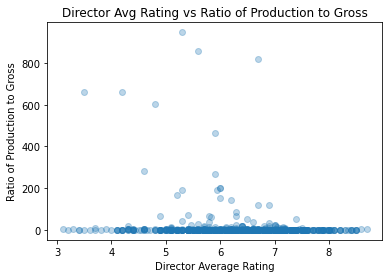

In [64]:
fig, ax = plt.subplots()
ax.scatter(director_avg['averagerating'], director_avg['ratio_production_to_gross'], alpha=.3)
ax.set_xlabel('Director Average Rating')
ax.set_ylabel('Ratio of Production to Gross')
ax.set_title('Director Avg Rating vs Ratio of Production to Gross');

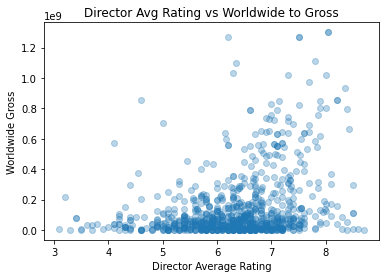

In [65]:
fig, ax = plt.subplots()
ax.scatter(director_avg['averagerating'], director_avg['worldwide_gross'], alpha=.3)
ax.set_xlabel('Director Average Rating')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Director Avg Rating vs Worldwide to Gross');

In [66]:
performers_avg = performers.groupby('primary_name').mean()

In [67]:
#performers_avg = performers_avg[performers_avg['ratio_production_to_gross'] < 1.00]
performers_avg.sort_values(by='averagerating', ascending=False, inplace=True)

In [68]:
performers_avg.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,ratio_production_to_gross
averagerating,1.000000,0.456113,0.175976,0.253989,0.250707,-0.145968
numvotes,0.456113,1.000000,0.551961,0.613188,0.631076,-0.118500
production_budget,0.175976,0.551961,1.000000,0.711191,0.781402,-0.106118
domestic_gross,0.253989,0.613188,0.711191,1.000000,0.942176,-0.113948
worldwide_gross,0.250707,0.631076,0.781402,0.942176,1.000000,-0.100866
ratio_production_to_gross,-0.145968,-0.118500,-0.106118,-0.113948,-0.100866,1.000000


Similarly, we can observe a slight negative correlation between the average rating of the performers and the ratio of production budget to gross. This is a good thing as the smaller the ratio  the production to worldwide is, the more profitable the movie. This makes our correlation negative.

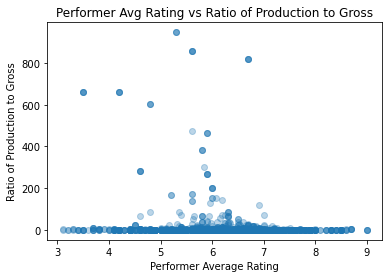

In [69]:
fig, ax = plt.subplots()
ax.scatter(performers_avg['averagerating'], performers_avg['ratio_production_to_gross'], alpha=.3)
ax.set_xlabel('Performer Average Rating')
ax.set_ylabel('Ratio of Production to Gross')
ax.set_title('Performer Avg Rating vs Ratio of Production to Gross');

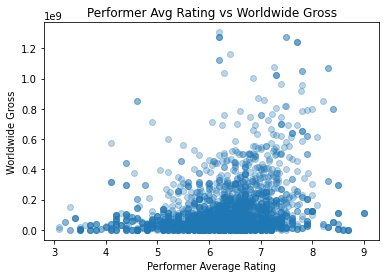

In [70]:
fig, ax = plt.subplots()
ax.scatter(performers_avg['averagerating'], performers_avg['worldwide_gross'], alpha=.3)
ax.set_xlabel('Performer Average Rating')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Performer Avg Rating vs Worldwide Gross');

see correlation between $$ spent and return - scatter

In the plot below, we can see that there's a slightly positive correlation between average rating and worldwide gross. We can also observe that many low budget